# Load the dataset

In [13]:
# Your code to import the necessary libraries and load the dataset
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# Read Elevator CSV file into a pandas DataFrame
df = pd.read_csv('CDS Elevator Arrivals (Responses) - Form Responses 1.csv')

print(df.columns)
# The Structure of the dataframe is "Timestamp,Elevator ID,Email Address"

# Brief overview of the DataFrame structure
print("\nDataFrame Structure:")
print(df.info())


Index(['Timestamp', 'Elevator ID', 'Email Address'], dtype='object')

DataFrame Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Timestamp      1807 non-null   object
 1   Elevator ID    1807 non-null   int64 
 2   Email Address  1807 non-null   object
dtypes: int64(1), object(2)
memory usage: 42.5+ KB
None


# Visualiztion 1

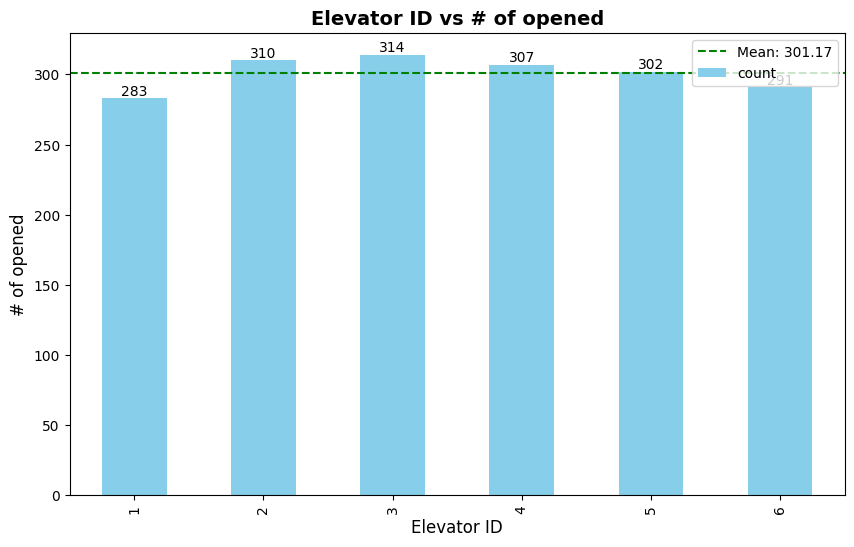

In [12]:
# Your code for first visualization - bars 
# Based on the ID of the elevator, Create bars chart of how many times it is opened through the whole dataset

# Preprocessing
# Count occurrences of each unique ID in the "ID" column
id_counts = df['Elevator ID'].value_counts()


# Calculate the mean value of the 'Value' column
mean_value = id_counts.mean()
# Sort the counts by index (ID) to get IDs in incrementing order
id_counts_sorted = id_counts.sort_index()

# Start ploting bar chart
plt.figure(figsize=(10, 6))
id_counts_sorted.plot(kind='bar', color='skyblue')

plt.title('Elevator ID vs # of opened', fontsize=14, fontweight='bold')
plt.xlabel('Elevator ID', fontsize=12)
plt.ylabel('# of opened', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#Plot a horizontal line at the mean value
plt.axhline(mean_value, color='green', linestyle='--', label=f'Mean: {mean_value:.2f}')

# Show the number of each ID on top of the bars
for idx, value in enumerate(id_counts_sorted):
    plt.text(idx, value, str(value), ha='center', va='bottom')

plt.legend()
plt.show()

*Your observatiaons and insights about the visualization above*

We can see that all the elevators generally had between 280 ~ 315 number of opend door. The average number of the all six elevators are 301.17. Among all six elevators, elevator 3 appears to have the most while elevator 1 has the least number of opened time.

# Visualiztion 2

Date         2024-09-16  2024-09-17  2024-09-18  2024-09-19
Elevator ID                                                
1                    30         125          86          42
2                    32         130          90          58
3                    29         141          93          51
4                    30         138          92          47
5                    26         141          85          50
6                    36         123          82          50


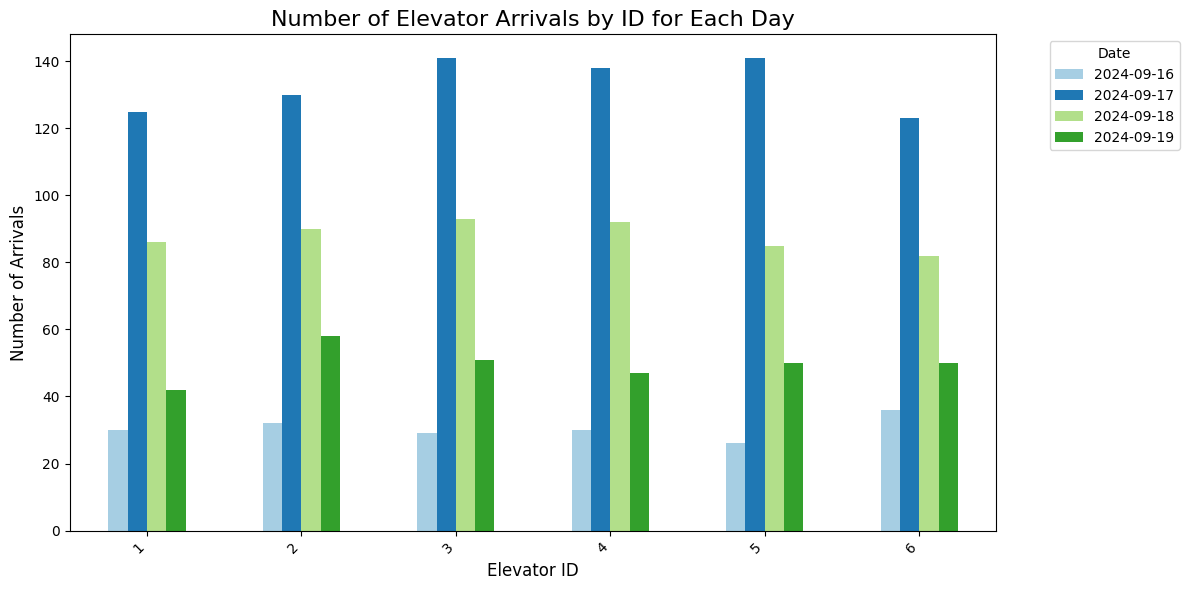

In [34]:
# Your code for second visualization - charts

# Create a new DataFrame for analysis
df_copy = df.copy()

# Convert the 'Timestamp' column to datetime and extract the date in one step
df_copy['Date'] = pd.to_datetime(df_copy['Timestamp']).dt.date

# Group by 'Elevator ID' and 'Date' and count the number of arrivals
arrival_counts = df_copy.groupby(['Elevator ID', 'Date']).size().unstack(fill_value=0)

# Create a bar chart
ax = arrival_counts.plot(kind='bar', figsize=(12, 6), color=plt.cm.Paired.colors)

# Set chart title and labels
ax.set_title('Number of Elevator Arrivals by ID for Each Day', fontsize=16)
ax.set_xlabel('Elevator ID', fontsize=12)
ax.set_ylabel('Number of Arrivals', fontsize=12)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Add a legend for the dates
ax.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tighten layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()

*Your observatiaons and insights about the visualization above*

We can see that most students took elevator data on 9/16, and we can see that on 9/16 elevator 6 had most arrivals, on 9/17 it was elevator 5, on 9/18 it was elevator 3, and on 9/19 it was elevator 2

# Visualiztion 3

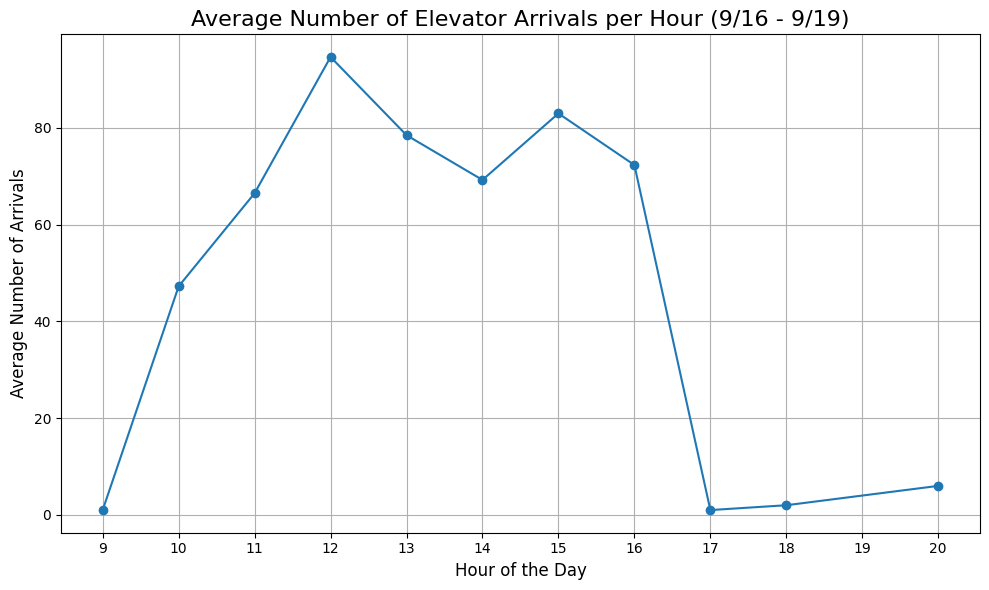

In [36]:
# Your code for third visualization - etc

# Create a new DataFrame for analysis
df_copy = df.copy()

# Convert the 'Timestamp' column to datetime
df_copy['Timestamp'] = pd.to_datetime(df_copy['Timestamp'])

# Extract the hour from the 'Timestamp' and create a new column
df_copy['Hour'] = df_copy['Timestamp'].dt.hour

# Extract the date for filtering later
df_copy['Date'] = df_copy['Timestamp'].dt.date

# Group by 'Hour' and 'Date' and count the number of arrivals
arrival_counts = df_copy.groupby(['Date', 'Hour']).size().reset_index(name='Count')

# Calculate the average number of arrivals per hour across the four days
average_counts = arrival_counts.groupby('Hour')['Count'].mean().reset_index()

# Plotting the average arrivals per hour
plt.figure(figsize=(10, 6))
plt.plot(average_counts['Hour'], average_counts['Count'], marker='o', linestyle='-')

# Set chart title and labels
plt.title('Average Number of Elevator Arrivals per Hour (9/16 - 9/19)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Number of Arrivals', fontsize=12)

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.xticks(range(9, 21))  # Show all hours on the x-axis
plt.tight_layout()
plt.show()


*Your observatiaons and insights about the visualization above*

We can see that at 12PM, there was the greatest number of Elevator opens, but this could also be due to when most students took data. Around 2pm the elevator usage is decreased and around 5pm most of the students are out of the building so the usaged of the elevator is decreased a lot.